## **Business Problem Understanding**

**Context**

Telecom companies are always working on challenges in managing customer retention. Churn prediction plays a pivotal role in addressing these challenges by identifying customers who are likely to leave. However, predicting churn is just the starting point. Effective retention strategies require actionable insights to reduce churn rates while optimizing resources to focus on high-value customers. Insights gained from churn prediction can help businesses with:
- Customer Segmentation
- Revenue Optimization
- Retention Strategies, especially address specific pain points of at risk customers

**Target**

The primary objective of this project is to predict whether a customer will churn (Yes/No) using historical data on customer demographics, services, and billing behavior. This will allow the telecom company to:
- Identify customers likely to churn and design effective retention campaigns
Provide strategic insights for customer experience improvements
- Support proactive decision making to enhance customer loyalty

**Problem Statement**

The goal of this project is to build a machine learning model that predicts customer churn. Additionally, we aim to analyze key factors contributing to churn to guide the design of effective retention strategies. These predictions will:
- Help the company prioritize retention efforts on high-risk customers
- Optimize resource allocation for retention campaigns
- Provide actionable recommendations to improve customer satisfaction and reduce churn rates

**Goals**

*Primary Goal* : Develop a classification model to predict customer churn (Yes/No) with high accuracy, precision, recall, and AUC-ROC
*Secondary Goal* : 
- Identify the most important features influencing churn
- Provide actionable insights for customer retention strategies, including segmentation and tailored campaigns


**Analytical Approach**

1. Data Analysis and Feature Engineering
- Perform exploratory data analysis (EDA) to understand patterns and trends in the dataset, such as service usage, contract types, and billing behavior
- Engineer meaningful features, such as tenure ranges and monthly charges groupings, to capture customer behaviors effectively
2. Model Building and Evaluation
- Train various machine learning models, such as Logistic Regression, Random Forest, Gradient Boosting, and Stacking Ensemble, to predict Churn
-Evaluate model performance using metrics like accuracy, precision, recall, F1-score, and AUC-ROC to select the best performing model
3. Insights Generation
- Analyze feature importance to understand key drivers of churn
- Develop customers segmentations trategies based on churn risk and value
4. Deployment
- Integrate the best model into a pipeline for streamlined predictions on unseen data
- Generate predictions to support customer retention decision making

**Metric Evaluation**

The following metrics will be used to evaluate model performance:
- Accuracy : How often the model correctly predicts churn or no churn
- Precision : The proportion of Churn predictions that are correct, focusing on minimizing false positives
- Recall : The proportion of actual churn cases the model correctly identifies, focusing on minimizing false negatives
- F1-Score : A harmonice mean of precision and recall, providing a balanced view of model performance
- AUC-ROC : Evaluates the trade-off between sensitivity (recall) and specificity across different thresholds, measuring the model's ability to distinguish churners from non-churners effectively

**Data Preparation**

### Data Understanding

In [1]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn import metrics
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

import pickle

In [2]:
telco_df = pd.read_csv('data_telco_customer_churn.csv')
telco_df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


In [3]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [4]:
telco_df.shape

(4930, 11)

Key Column Description:

'tenure' : Duration (in months) the customer has stayed with the company

'InternetService', 'Contract', 'PaymentMethod': Features related to customer behavior

'MonthlyChargers' : Monthly payment by the customer

'Churn' : Target variable, 'Yes' means the customer churned

In [5]:
listItem = []
for col in telco_df.columns :
    listItem.append([col, telco_df[col].dtype, telco_df[col].isna().sum(), round((telco_df[col].isna().sum()/len(telco_df[col])) * 100,2),
                    telco_df[col].nunique(), list(telco_df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[Yes, No]"
1,tenure,int64,0,0.0,73,"[47, 49]"
2,OnlineSecurity,object,0,0.0,3,"[No internet service, No]"
3,OnlineBackup,object,0,0.0,3,"[No internet service, No]"
4,InternetService,object,0,0.0,3,"[No, DSL]"
5,DeviceProtection,object,0,0.0,3,"[No, No internet service]"
6,TechSupport,object,0,0.0,3,"[No, Yes]"
7,Contract,object,0,0.0,3,"[One year, Two year]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0,0.0,1422,"[24.3, 48.65]"


In [6]:
unq_values = telco_df.select_dtypes(include=['object']).columns
for col in unq_values:
    print(f"\nUnique values in '{col}' : {telco_df[col].unique()}")


Unique values in 'Dependents' : ['Yes' 'No']

Unique values in 'OnlineSecurity' : ['No' 'Yes' 'No internet service']

Unique values in 'OnlineBackup' : ['No' 'Yes' 'No internet service']

Unique values in 'InternetService' : ['DSL' 'Fiber optic' 'No']

Unique values in 'DeviceProtection' : ['Yes' 'No internet service' 'No']

Unique values in 'TechSupport' : ['Yes' 'No' 'No internet service']

Unique values in 'Contract' : ['Month-to-month' 'Two year' 'One year']

Unique values in 'PaperlessBilling' : ['Yes' 'No']

Unique values in 'Churn' : ['Yes' 'No']


Check missing value

In [7]:
telco_df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Checking Outliers

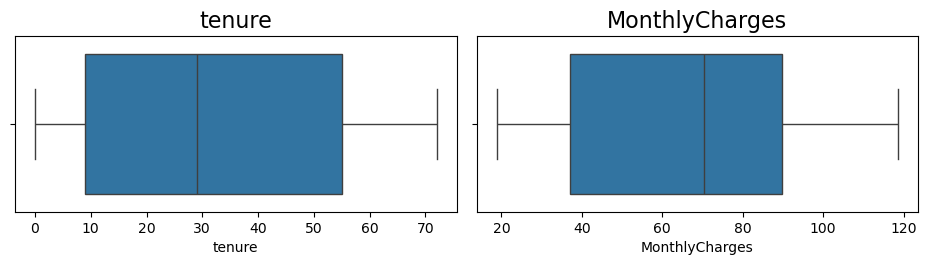

In [8]:
telco_out = telco_df[['tenure', 'MonthlyCharges']]

plt.figure(figsize=(14,7))
plotnumber = 1
for feature in telco_out:
    axis = plt.subplot(3,3, plotnumber)
    sns.boxplot(x=feature, data=telco_df);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

In [9]:
def outliers(col):

    q3 = col.describe().loc['75%']
    q1 = col.describe().loc['25%']

    iqr = q3-q1

    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr

    print('Upper fence: ', upper)
    print('Lower fence: ', lower)

for i in list(telco_df.describe()):
    print(i)
    outliers(telco_df[i].round(0))
    print()

tenure
Upper fence:  124.0
Lower fence:  -60.0

MonthlyCharges
Upper fence:  169.125
Lower fence:  -41.875



In [10]:
lower_tenure = 0
upper_tenure = 72

lower_charges = 0
upper_charges = 169.125

tenure_outliers = telco_df[(telco_df['tenure'] < lower_tenure) | (telco_df['tenure'] < upper_tenure)]
charges_outliers = telco_df[(telco_df['MonthlyCharges'] < lower_charges) | (telco_df['MonthlyCharges'] < upper_charges)]
print('tenure outliers:\n', tenure_outliers.describe().round())
print('MonthlyCharges outliers:\n', charges_outliers.describe().round())


tenure outliers:
        tenure  MonthlyCharges
count  4680.0          4680.0
mean     30.0            64.0
std      23.0            30.0
min       0.0            19.0
25%       8.0            36.0
50%      26.0            70.0
75%      52.0            89.0
max      71.0           119.0
MonthlyCharges outliers:
        tenure  MonthlyCharges
count  4930.0          4930.0
mean     32.0            65.0
std      25.0            30.0
min       0.0            19.0
25%       9.0            37.0
50%      29.0            70.0
75%      55.0            90.0
max      72.0           119.0


Checking 0 in tenure

In [11]:
tenure_zero = telco_df[telco_df['tenure'] == 0]
print("Number of records with tenure = 0: {len(tenure_zero)}")
print(tenure_zero.describe())

Number of records with tenure = 0: {len(tenure_zero)}
       tenure  MonthlyCharges
count     8.0        8.000000
mean      0.0       48.768750
std       0.0       24.116502
min       0.0       19.850000
25%       0.0       24.075000
50%       0.0       54.300000
75%       0.0       64.762500
max       0.0       80.850000


Checking 0 in MonthlyCharges

In [12]:
charges_zero = telco_df[telco_df['MonthlyCharges'] == 0]
print("Number of records with tenure = 0: {len(charges_zero)}")
print(charges_zero.describe())

Number of records with tenure = 0: {len(charges_zero)}
       tenure  MonthlyCharges
count     0.0             0.0
mean      NaN             NaN
std       NaN             NaN
min       NaN             NaN
25%       NaN             NaN
50%       NaN             NaN
75%       NaN             NaN
max       NaN             NaN


Checking Tenure=0 and Churn=Yes

In [13]:
telco_df[(telco_df['tenure'] == 0) & (telco_df['Churn'] == 'Yes')].shape[0]

0

Drop 0 in Tenure with new dataframe to clean

In [14]:
telco2_df = telco_df[telco_df['tenure'] > 0]
print("Number of rows before removing tenure = 0 :")
print(telco_df.shape[0])
print("Number of rows after removing tenure = 0 :")
print(telco2_df.shape[0])

Number of rows before removing tenure = 0 :
4930
Number of rows after removing tenure = 0 :
4922


In [15]:
listItem = []
for col in telco2_df.columns :
    listItem.append([col, telco2_df[col].dtype, telco_df[col].isna().sum(), round((telco2_df[col].isna().sum()/len(telco2_df[col])) * 100,2),
                    telco2_df[col].nunique(), list(telco2_df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[No, Yes]"
1,tenure,int64,0,0.0,72,"[26, 55]"
2,OnlineSecurity,object,0,0.0,3,"[Yes, No]"
3,OnlineBackup,object,0,0.0,3,"[No, No internet service]"
4,InternetService,object,0,0.0,3,"[DSL, Fiber optic]"
5,DeviceProtection,object,0,0.0,3,"[No internet service, Yes]"
6,TechSupport,object,0,0.0,3,"[No internet service, Yes]"
7,Contract,object,0,0.0,3,"[Two year, One year]"
8,PaperlessBilling,object,0,0.0,2,"[No, Yes]"
9,MonthlyCharges,float64,0,0.0,1421,"[102.65, 92.85]"


In [16]:
def outliers(col):

    q3 = col.describe().loc['75%']
    q1 = col.describe().loc['25%']

    iqr = q3-q1

    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr

    print('Upper fence: ', upper)
    print('Lower fence: ', lower)

for i in list(telco2_df.describe()):
    print(i)
    outliers(telco2_df[i].round(0))
    print()

tenure
Upper fence:  126.5
Lower fence:  -61.5

MonthlyCharges
Upper fence:  167.625
Lower fence:  -39.375



Both 'tenure' and 'MonthlyCharges' fall within their respective fences. Negative lower fences are irrelevant due to the nature of the data since there're no negative numbers. So the dataset is pretty much clean for these features, and no further action is needed for handling outliers.

### **EDA**

Replace 'No internet service' with 'No' for the below mentioned columns

In [17]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
for i in cols :
    telco2_df[i] = telco2_df[i].replace({'No internet service' : 'No'})

Visualization for Total Customer Churn

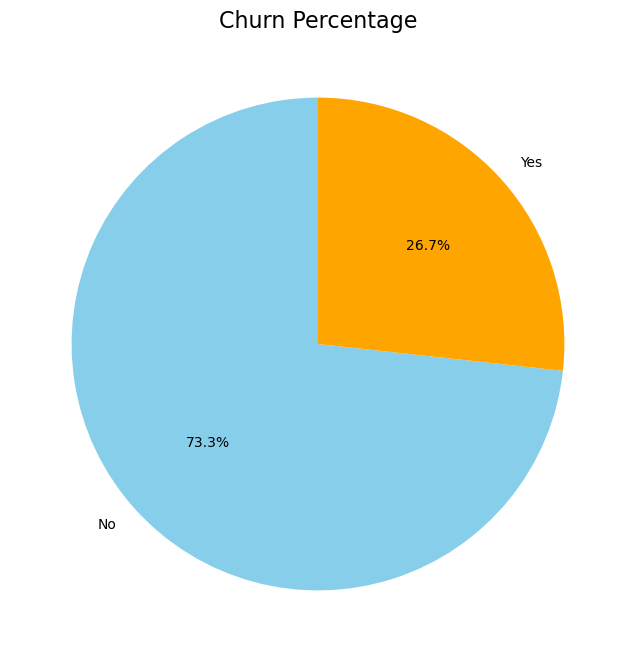

In [18]:
churn_counts = telco2_df['Churn'].value_counts()
churn_percents = (churn_counts / len(telco2_df)) * 100

plt.figure(figsize=(8,8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Churn Percentage', fontsize=16)
plt.show()

Churn vs Other Features

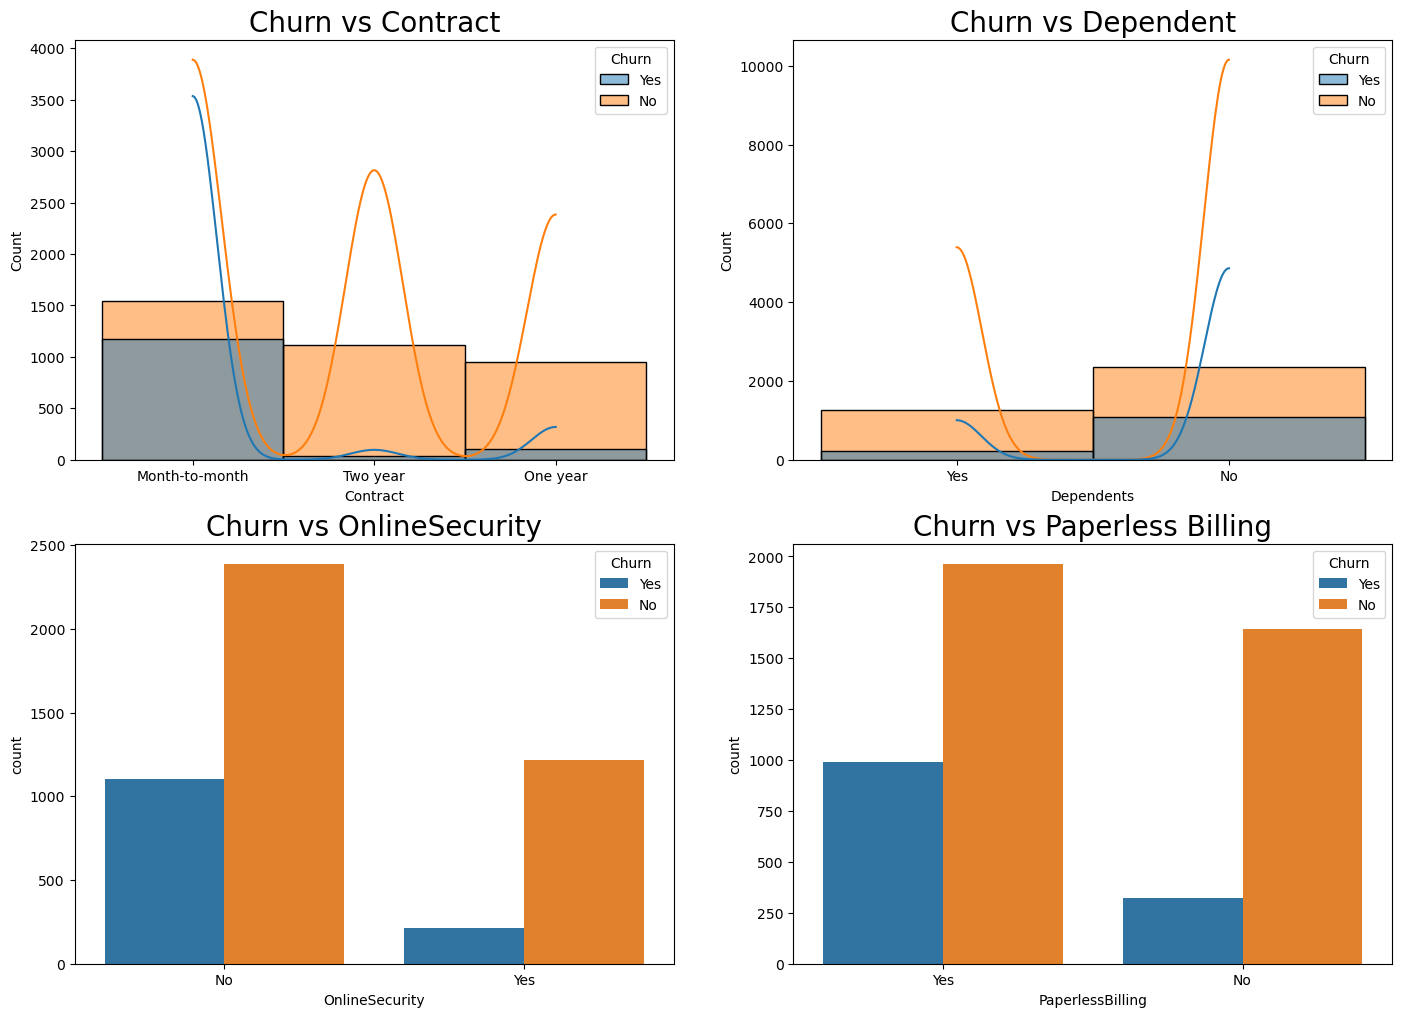

In [19]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=telco2_df,x='Contract',hue='Churn',kde=True)
plt.title('Churn vs Contract',fontsize=20)

plt.subplot(222)
sns.histplot(data=telco2_df,x='Dependents',hue='Churn',kde=True)
plt.title('Churn vs Dependent',fontsize=20)

plt.subplot(223)
sns.countplot(data=telco2_df,x='OnlineSecurity', hue='Churn')
plt.title('Churn vs OnlineSecurity',fontsize=20)

plt.subplot(224)
sns.countplot(data=telco2_df,x='PaperlessBilling', hue='Churn')
plt.title('Churn vs Paperless Billing',fontsize=20)
plt.show()

In [20]:
churn_contract = telco2_df.groupby(['Contract', 'Churn']).size().reset_index(name='Count')
print("Churn vs Contract Results:")
print(churn_contract)

churn_dependents = telco2_df.groupby(['Dependents', 'Churn']).size().reset_index(name='Count')
print("Churn vs Dependents Results:")
print(churn_dependents)

churn_onsec = telco2_df.groupby(['OnlineSecurity', 'Churn']).size().reset_index(name='Count')
print("Churn vs Online Security Results:")
print(churn_onsec)

churn_paperless = telco2_df.groupby(['PaperlessBilling', 'Churn']).size().reset_index(name='Count')
print("Churn vs Paperless Billing Results:")
print(churn_paperless)

Churn vs Contract Results:
         Contract Churn  Count
0  Month-to-month    No   1543
1  Month-to-month   Yes   1178
2        One year    No    946
3        One year   Yes    106
4        Two year    No   1117
5        Two year   Yes     32
Churn vs Dependents Results:
  Dependents Churn  Count
0         No    No   2355
1         No   Yes   1091
2        Yes    No   1251
3        Yes   Yes    225
Churn vs Online Security Results:
  OnlineSecurity Churn  Count
0             No    No   2389
1             No   Yes   1104
2            Yes    No   1217
3            Yes   Yes    212
Churn vs Paperless Billing Results:
  PaperlessBilling Churn  Count
0               No    No   1642
1               No   Yes    325
2              Yes    No   1964
3              Yes   Yes    991


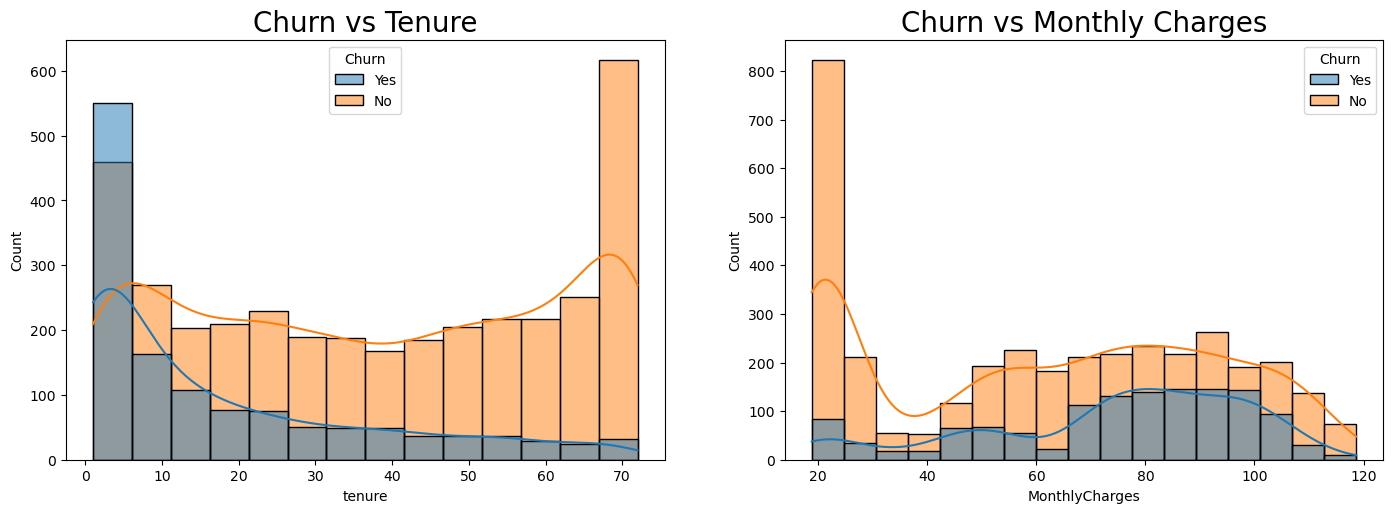

In [21]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=telco2_df,x='tenure',hue='Churn',kde=True)
plt.title('Churn vs Tenure',fontsize=20)

plt.subplot(222)
sns.histplot(data=telco2_df,x='MonthlyCharges',hue='Churn',kde=True)
plt.title('Churn vs Monthly Charges',fontsize=20)
plt.show()

In [22]:
#Tenure Grouping
tenure_bins = [0, 10, 20, 30, 40, 50, 60, 72]
tenure_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-72']
telco2_df['tenure_group'] = pd.cut(telco2_df['tenure'], bins=tenure_bins, labels=tenure_labels, include_lowest=True)

#MonthlyCharges Grouping
mc_bins = [0, 20, 40, 60, 80, 100, 120]
mc_labels = ['$0-20', '$21-40', '$41-60', '$61-80', '$81-100', '$101-120']
telco2_df['mc_group'] = pd.cut(telco2_df['MonthlyCharges'], bins=mc_bins, labels=mc_labels, include_lowest=True)

churn_tenure = telco2_df.groupby(['tenure_group', 'Churn']).size().reset_index(name='Count')
print('Churn Counts by Tenure Group:')
print(churn_tenure)

Churn Counts by Tenure Group:
   tenure_group Churn  Count
0          0-10    No    686
1          0-10   Yes    694
2         11-20    No    424
3         11-20   Yes    193
4         21-30    No    411
5         21-30   Yes    127
6         31-40    No    353
7         31-40   Yes     97
8         41-50    No    386
9         41-50   Yes     77
10        51-60    No    435
11        51-60   Yes     65
12        61-72    No    911
13        61-72   Yes     63


In [23]:
churn_mc = telco2_df.groupby(['mc_group', 'Churn']).size().reset_index(name='Count')
print('Churn Counts by Monthly Charges Group:')
print(churn_mc)

Churn Counts by Monthly Charges Group:
    mc_group Churn  Count
0      $0-20    No    410
1      $0-20   Yes     39
2     $21-40    No    706
3     $21-40   Yes    106
4     $41-60    No    570
5     $41-60   Yes    197
6     $61-80    No    704
7     $61-80   Yes    330
8    $81-100    No    757
9    $81-100   Yes    474
10  $101-120    No    459
11  $101-120   Yes    170


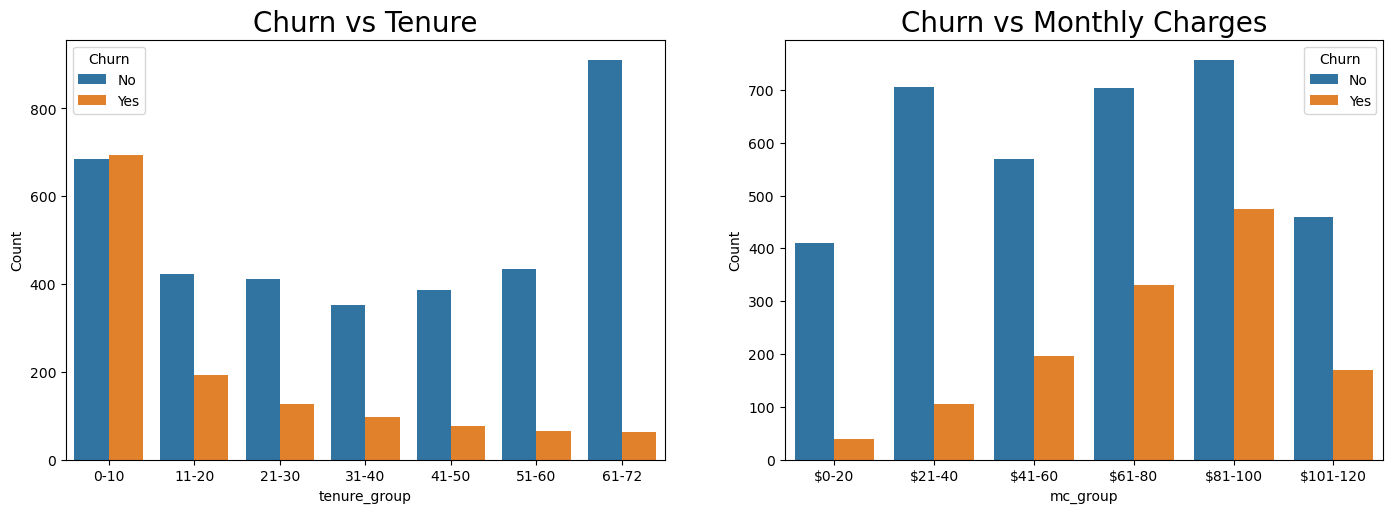

In [24]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.barplot(data=churn_tenure,x='tenure_group', y='Count', hue='Churn')
plt.title('Churn vs Tenure',fontsize=20)

plt.subplot(222)
sns.barplot(data=churn_mc,x='mc_group', y='Count', hue='Churn')
plt.title('Churn vs Monthly Charges',fontsize=20)
plt.show()

### **Data Preprocessing**

Encode Features

In [25]:
#Binary encoding for Binary features
binary = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'Churn']
for feature in binary:
    telco2_df[feature] = telco2_df[feature].apply(lambda x:1 if x == 'Yes' else 0)

#One hot encode categorical features
telco2_df = pd.get_dummies(telco2_df, columns=['Contract', 'InternetService', 'tenure_group', 'mc_group'], drop_first=True)

In [26]:
telco2_df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,Churn,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,tenure_group_11-20,tenure_group_21-30,tenure_group_31-40,tenure_group_41-50,tenure_group_51-60,tenure_group_61-72,mc_group_$21-40,mc_group_$41-60,mc_group_$61-80,mc_group_$81-100,mc_group_$101-120
0,1,9,0,0,1,1,1,72.90,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,0,14,0,1,1,0,1,82.65,0,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False
2,0,64,1,0,1,1,0,47.85,1,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False
3,0,72,1,1,1,1,0,69.65,0,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False
4,0,3,0,0,0,0,1,23.60,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False


In [27]:
print(telco2_df.dtypes)

Dependents                       int64
tenure                           int64
OnlineSecurity                   int64
OnlineBackup                     int64
DeviceProtection                 int64
TechSupport                      int64
PaperlessBilling                 int64
MonthlyCharges                 float64
Churn                            int64
Contract_One year                 bool
Contract_Two year                 bool
InternetService_Fiber optic       bool
InternetService_No                bool
tenure_group_11-20                bool
tenure_group_21-30                bool
tenure_group_31-40                bool
tenure_group_41-50                bool
tenure_group_51-60                bool
tenure_group_61-72                bool
mc_group_$21-40                   bool
mc_group_$41-60                   bool
mc_group_$61-80                   bool
mc_group_$81-100                  bool
mc_group_$101-120                 bool
dtype: object


**Training Models**

Perform Feature Scaling

In [28]:
standardScaler = StandardScaler()
col_ft_scaling = ['tenure', 'MonthlyCharges']
telco2_df[col_ft_scaling] = standardScaler.fit_transform(telco2_df[col_ft_scaling])

In [29]:
telco2_df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,Churn,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,tenure_group_11-20,tenure_group_21-30,tenure_group_31-40,tenure_group_41-50,tenure_group_51-60,tenure_group_61-72,mc_group_$21-40,mc_group_$41-60,mc_group_$61-80,mc_group_$81-100,mc_group_$101-120
0,1,-0.957937,0,0,1,1,1,0.267033,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,0,-0.753720,0,1,1,0,1,0.592854,0,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False
2,0,1.288452,1,0,1,1,0,-0.570078,1,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False
3,0,1.615200,1,1,1,1,0,0.158425,0,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False
4,0,-1.202998,0,0,0,0,1,-1.380455,0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False


Preparing features and target

In [30]:
#Create feature variable X and Target variable y
X = telco2_df.drop(columns=['Churn'], axis = 1)
y = telco2_df['Churn']

Splitting the data into training set

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=42
)
print(f'Training set size: {X_train.shape[0]} rows')
print(f'Testing set size: {X_test.shape[0]} rows')

Training set size: 3937 rows
Testing set size: 985 rows


In [32]:
print('Class distribution in y_train:')
print(y_train.value_counts(normalize=True))
print('Class distribution in y_test:')
print(y_test.value_counts(normalize=True))

Class distribution in y_train:
Churn
0    0.731775
1    0.268225
Name: proportion, dtype: float64
Class distribution in y_test:
Churn
0    0.736041
1    0.263959
Name: proportion, dtype: float64


### **Model Training**

In [33]:
#Fit the Logistic Regression Model
logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train, y_train)

#Predict the value for new, unseen data
pred = logmodel.predict(X_test)

#Find Accuracy using accurancy score method
logmod_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)

In [34]:
#Fit the K-Nearest Neighbor Model
knnmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knnmodel.fit(X_train, y_train)

#Predict the value for new, unseen data
knn_pred = knnmodel.predict(X_test)

#Find Accuracy using accuracy score method
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred) * 100, 2)

In [35]:
#Fit the Decision Tree Classification Model
dtcmodel = DecisionTreeClassifier(criterion = 'gini', random_state = 50)
dtcmodel.fit(X_train, y_train)

#Predict the value for new, unseen data
dtc_pred = dtcmodel.predict(X_test)

#Find Accuracy using accuracy score method
dtc_accuracy = round(metrics.accuracy_score(y_test, dtc_pred) * 100, 2)

In [36]:
#Fit the Random Forest Classification Model
rfcmodel = RandomForestClassifier(n_estimators=100,criterion='entropy', random_state = 0)
rfcmodel.fit(X_train, y_train)

#Predict the value for new, unseen data
rfc_pred = rfcmodel.predict(X_test)

#Find Accuracy using accuracy score method
rfc_accuracy = round(metrics.accuracy_score(y_test, rfc_pred) * 100, 2)

In [37]:
#Fit the Gradient Boosting Classifier Model
gbcmodel = GradientBoostingClassifier(random_state=50)
gbcmodel.fit(X_train, y_train)

#Predict the value for new, unseen data
gbc_pred = gbcmodel.predict(X_test)

#Find Accuracy using accurancy score method
gbc_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)

#### Model Comparison

In [38]:
model_comparison = pd.DataFrame ({
    'Model' : ['Logistic Regression', 'K-Nearest Neighbor', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Score' : [logmod_accuracy, knn_accuracy, dtc_accuracy, rfc_accuracy, gbc_accuracy]
})
model_comparison_telco = model_comparison.sort_values(by='Score', ascending=False)
model_comparison_telco = model_comparison_telco.set_index('Score')
model_comparison_telco.reset_index()

,Score,Model
0,79.90,Logistic Regression
1,79.90,Gradient Boosting
2,76.65,Random Forest
3,75.94,K-Nearest Neighbor
4,72.28,Decision Tree


1. **Top Performing Models** : Logistic Regression and Gradient Boosting share tthe highest accuracy (79.90%). Logistic Regression offers simplicity and interpretability, while Gradient Boosting provides enhanced prediction power
2. **Ensemble Strength** : Both Random Forest and Gradient Boosting demonstrate the advantages of ensemble methods in improving predictive performance over standalone Decision Trees
3. **Model Selection** : The choice of the best model depends on the balance between performance and interpretability, For actionable insights, Logistic Regression is preffered, while Gradient Boosting is ideal for maximizing prediction accuracy

In [39]:
#Generate confusion matrix for logistics regression model as it  has max accuracy
confmat_logmodel = confusion_matrix(y_test, pred)
confmat_logmodel

array([[650,  75],
       [123, 137]])

#### *Test Oversampling*

In [40]:
#Initialize Logistic Regression with Class Weighting
logmodel_weighting = LogisticRegression(random_state=50, class_weight='balanced')
logmodel_weighting.fit(X_train, y_train)

#Predict and evaluate
pred_weighting = logmodel_weighting.predict(X_test)
print('Classification Report with Class Weighting: ')
print(classification_report(y_test, pred_weighting))

#AUC-ROC Score
pred_weighting_prob = logmodel_weighting.predict_proba(X_test) [:, 1]
print('\nAUC-ROC Score:', round(roc_auc_score(y_test, pred_weighting_prob) * 100,2))

#Confusion Matrix
confmat_weighting = confusion_matrix(y_test, pred_weighting)
print('\nConfusion Matrix:\n', confmat_weighting)

Classification Report with Class Weighting: 
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       725
           1       0.51      0.81      0.62       260

    accuracy                           0.74       985
   macro avg       0.71      0.76      0.71       985
weighted avg       0.81      0.74      0.76       985


AUC-ROC Score: 84.1

Confusion Matrix:
 [[520 205]
 [ 50 210]]


Explore Stacking Ensemble

In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), col_ft_scaling)
    ],
    remainder='passthrough'
)
base_models = [
    ('logistic', LogisticRegression(max_iter=1000, random_state=50)),
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=50)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=50))
]

meta_model =LogisticRegression()
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)

#Create Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacking', stacking_model)
])
pipeline.fit(X_train, y_train)

#Predict and evaluation
y_pred_stack = pipeline.predict(X_test)
y_pred_stack_prob = pipeline.predict_proba(X_test) [:, 1]

#Evaluation metrics
print('Classification Report for Stacking ensemble:\n')
print(classification_report(y_test, y_pred_stack))
print('\nAUC-ROC Score for Stacking ensemble:', round(roc_auc_score(y_test, y_pred_stack_prob)*100,2))
confmat_stack = confusion_matrix(y_test, y_pred_stack)
print('\nConfusion Matrix for Stacking ensemble:\n', confmat_stack)

Classification Report for Stacking ensemble:

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       725
           1       0.65      0.50      0.57       260

    accuracy                           0.80       985
   macro avg       0.74      0.70      0.72       985
weighted avg       0.79      0.80      0.79       985


AUC-ROC Score for Stacking ensemble: 84.32

Confusion Matrix for Stacking ensemble:
 [[655  70]
 [130 130]]


Explore Voting Classifier

In [42]:
base_vote_models = [
    ('logistic', LogisticRegression(class_weight='balanced', random_state=50)),
    ('random_forest', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=50)),
    ('stacking', StackingClassifier(estimators=[
        ('logistic', LogisticRegression(class_weight='balanced', random_state=50)),
        ('random_forest', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=50)),
        ('gradient_boosting', GradientBoostingClassifier(random_state=50))
    ], final_estimator=LogisticRegression(random_state=50), cv=3))
]

#Create voting classifier with soft voting (using probability)
voting_model = VotingClassifier(estimators=base_vote_models, voting='soft')
voting_model.fit(X_train, y_train)

#Predict and evaluation
y_pred_vote = voting_model.predict(X_test)
y_pred_vote_prob = voting_model.predict_proba(X_test) [:, 1]

#Evaluation metrics
print('Classification Report for Voting Classifier:n')
print(classification_report(y_test, y_pred_vote))
print('\nAUC-ROC Score for Voting Classifier:', round(roc_auc_score(y_test, y_pred_vote_prob)*100,2))
confmat_vote = confusion_matrix(y_test, y_pred_vote)
print('\nConfusion Matrix for Voting Classifier:\n', confmat_vote)

Classification Report for Voting Classifier:n
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       725
           1       0.58      0.64      0.61       260

    accuracy                           0.78       985
   macro avg       0.73      0.74      0.73       985
weighted avg       0.79      0.78      0.79       985


AUC-ROC Score for Voting Classifier: 84.2

Confusion Matrix for Voting Classifier:
 [[606 119]
 [ 93 167]]


Model comparison based on their performance metrics

In [43]:
logmod_accuracy = 74.0
smote_accuracy = 76.0
stacking_accuracy = 80.0
voting_accuracy = 78.0

logmod_recall = 81.0
smote_recall = 79.0
stacking_recall = 50.0
voting_recall = 64.0

models_comparison = pd.DataFrame ({
    'Model' : ['Logistic Regression (Class Weighting)', 'Logistic Regression (SMOTE)', 'Stacking Ensemble', 'Voting Classifier'],
    'Accuracy (%)' : [logmod_accuracy, smote_accuracy, stacking_accuracy, voting_accuracy],
    'Precision (Churn = 1)' : [51.0, 53.0, 65.0, 58.0],
    'Recall (Churn = 1)' : [logmod_recall, smote_recall, stacking_recall, voting_recall],
    'F1-Score (Churn = 1)' : [62.0, 63.0, 57.0, 61.0],
    'AUC-ROC (%)' : [84.1, 84.05, 84.32, 84.2]
})
models_comparison_telco = models_comparison.sort_values(by='AUC-ROC (%)', ascending=False)
models_comparison_telco = models_comparison_telco.set_index('Model')
models_comparison_telco.reset_index()

,Model,Accuracy (%),Precision (Churn = 1),Recall (Churn = 1),F1-Score (Churn = 1),AUC-ROC (%)
0,Stacking Ensemble,80.0,65.0,50.0,57.0,84.32
1,Voting Classifier,78.0,58.0,64.0,61.0,84.20
2,Logistic Regression (Class Weighting),74.0,51.0,81.0,62.0,84.10
3,Logistic Regression (SMOTE),76.0,53.0,79.0,63.0,84.05


#### **Model Benchmarking : Test Data**

In [44]:
models_comparison_telco = models_comparison.sort_values(by='AUC-ROC (%)', ascending=False)
models_comparison_telco.reset_index(drop=True)
best_accuracy = models_comparison_telco.loc[models_comparison_telco['Accuracy (%)'].idxmax()]
best_precision = models_comparison_telco.loc[models_comparison_telco['Precision (Churn = 1)'].idxmax()]
best_recall = models_comparison_telco.loc[models_comparison_telco['Recall (Churn = 1)'].idxmax()]
best_F1 = models_comparison_telco.loc[models_comparison_telco['F1-Score (Churn = 1)'].idxmax()]
best_aucroc = models_comparison_telco.loc[models_comparison_telco['AUC-ROC (%)'].idxmax()]

In [45]:
print('Benchmarking Models Based on Metrics:')
print(f"Best Model for Accuracy: {best_accuracy['Model']} ({best_accuracy['Accuracy (%)']}%)")
print(f"Best Model for Precision (Churn = 1): {best_precision['Model']} ({best_precision['Precision (Churn = 1)']}%)")
print(f"Best Model for Recall (Churn = 1): {best_recall['Model']} ({best_recall['Recall (Churn = 1)']}%)")
print(f"Best Model for F1-Score (Churn = 1): {best_F1['Model']} ({best_F1['F1-Score (Churn = 1)']}%)")
print(f"Best Model for AUC-ROC: {best_aucroc['Model']} ({best_aucroc['AUC-ROC (%)']}%)")

Benchmarking Models Based on Metrics:
Best Model for Accuracy: Stacking Ensemble (80.0%)
Best Model for Precision (Churn = 1): Stacking Ensemble (65.0%)
Best Model for Recall (Churn = 1): Logistic Regression (Class Weighting) (81.0%)
Best Model for F1-Score (Churn = 1): Logistic Regression (SMOTE) (63.0%)
Best Model for AUC-ROC: Stacking Ensemble (84.32%)


1. **Overall Best Model** : The Stacking Ensemble emerges as the most balanced and high performing model across most metrics, particularly excelling in accuracym precision and AUC-ROC
2. **Specialized Models** :
- Logistic Regression with class weighting is ideal for maxiizing recall, ensuring no churned customers are missed
- Logistic Regression with SMOTE offers the best balance of precision and recall for scenarios requiring an even trade off
3. **Final Recommendation** : While Stacking Ensemble is the best overall model for predicting churn, specific use cases may benefit from specialized models like Logistic Regression for higher recall or balanced F1-score

By incorporating these insights into the project, the benchmarking reults provide clear guidance on model performance and their optimal application in addressing customer churn

### **Hyperparameter Tuning**

In [46]:
base_model = [
    ('rf', RandomForestClassifier(random_state=50)),
    ('gb', GradientBoostingClassifier(random_state=50)),
    ('lr', LogisticRegression(random_state=50))
]
meta_models = LogisticRegression(random_state=50)
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_models)

In [47]:
param_grid = {
    'stacking__cv' : [3,5],
    'stacking__final_estimator__C' : [0.01, 0.1, 1, 10],
    'stacking__final_estimator__solver' : ['liblinear', 'lbfgs'],
    'stacking__stack_method' : ['auto', 'predict_proba', 'decision_function']
}

num_features = ['tenure', 'MonthlyCharges']
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), num_features)],
    remainder = 'passthrough'
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacking', stacking_clf)
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"Best Model Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END stacking__cv=3, stacking__final_estimator__C=0.01, stacking__final_estimator__solver=liblinear, stacking__stack_method=predict_proba; total time=  19.2s
[CV] END stacking__cv=3, stacking__final_estimator__C=0.01, stacking__final_estimator__solver=liblinear, stacking__stack_method=auto; total time=  19.3s
[CV] END stacking__cv=3, stacking__final_estimator__C=0.01, stacking__final_estimator__solver=liblinear, stacking__stack_method=auto; total time=  19.4s
[CV] END stacking__cv=3, stacking__final_estimator__C=0.01, stacking__final_estimator__solver=liblinear, stacking__stack_method=auto; total time=  19.3s
[CV] END stacking__cv=3, stacking__final_estimator__C=0.01, stacking__final_estimator__solver=liblinear, stacking__stack_method=decision_function; total time=   5.5s
[CV] END stacking__cv=3, stacking__final_estimator__C=0.01, stacking__final_estimator__solver=liblinear, stacking__stack_method=decision_function; tota

In [48]:
estimator = StackingClassifier(estimators=base_models, final_estimator=meta_model)
estimator.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred_default = estimator.predict(X_test)
y_pred_proba_default = estimator.predict_proba(X_test)

y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test) [:, 1]

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

conf_matrix = confusion_matrix(y_test, y_pred_tuned)

report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default Stacking Ensemble : \n', report_default)
print('Classification Report Tuned Stacking Ensemble : \n', report_tuned)
print(f'ROC AUC Score Default Stacking Ensemble : {roc_auc_default:.2f}')
print(f'ROC AUC Score Tuned Stacking Ensemble : {roc_auc_tuned:.2f}')
print("\nConfusion Matrix:\n", conf_matrix)

Classification Report Default Stacking Ensemble : 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       725
           1       0.65      0.51      0.57       260

    accuracy                           0.80       985
   macro avg       0.74      0.71      0.72       985
weighted avg       0.79      0.80      0.79       985

Classification Report Tuned Stacking Ensemble : 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       725
           1       0.66      0.51      0.57       260

    accuracy                           0.80       985
   macro avg       0.75      0.71      0.72       985
weighted avg       0.79      0.80      0.79       985

ROC AUC Score Default Stacking Ensemble : 0.84
ROC AUC Score Tuned Stacking Ensemble : 0.84

Confusion Matrix:
 [[655  70]
 [127 133]]


### **Feature Importance**

In [49]:
rf_model = best_model.named_steps['stacking'].estimators_[0]
gb_model = best_model.named_steps['stacking'].estimators_[1]
lr_model = best_model.named_steps['stacking'].final_estimator_


rf_importance = rf_model.feature_importances_ if hasattr(rf_model, 'feature_importances_') else None
gb_importance = gb_model.feature_importances_ if hasattr(gb_model, 'feature_importances_') else None
lr_coef = lr_model.coef_ 

feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

rf_feature_importances = pd.Series(rf_importance, index=feature_names).sort_values(ascending=False)
gb_feature_importances = pd.Series(gb_importance, index=feature_names).sort_values(ascending=False)

if lr_coef.ndim == 1:
    lr_feature_importances = pd.Series(lr_coef[0], index=feature_names[:len(lr_coef[0])]).sort_values(ascending=False)
else:
    lr_feature_importances = pd.Series(lr_coef[0], index=feature_names[:len(lr_coef[0])]).sort_values(ascending=False)


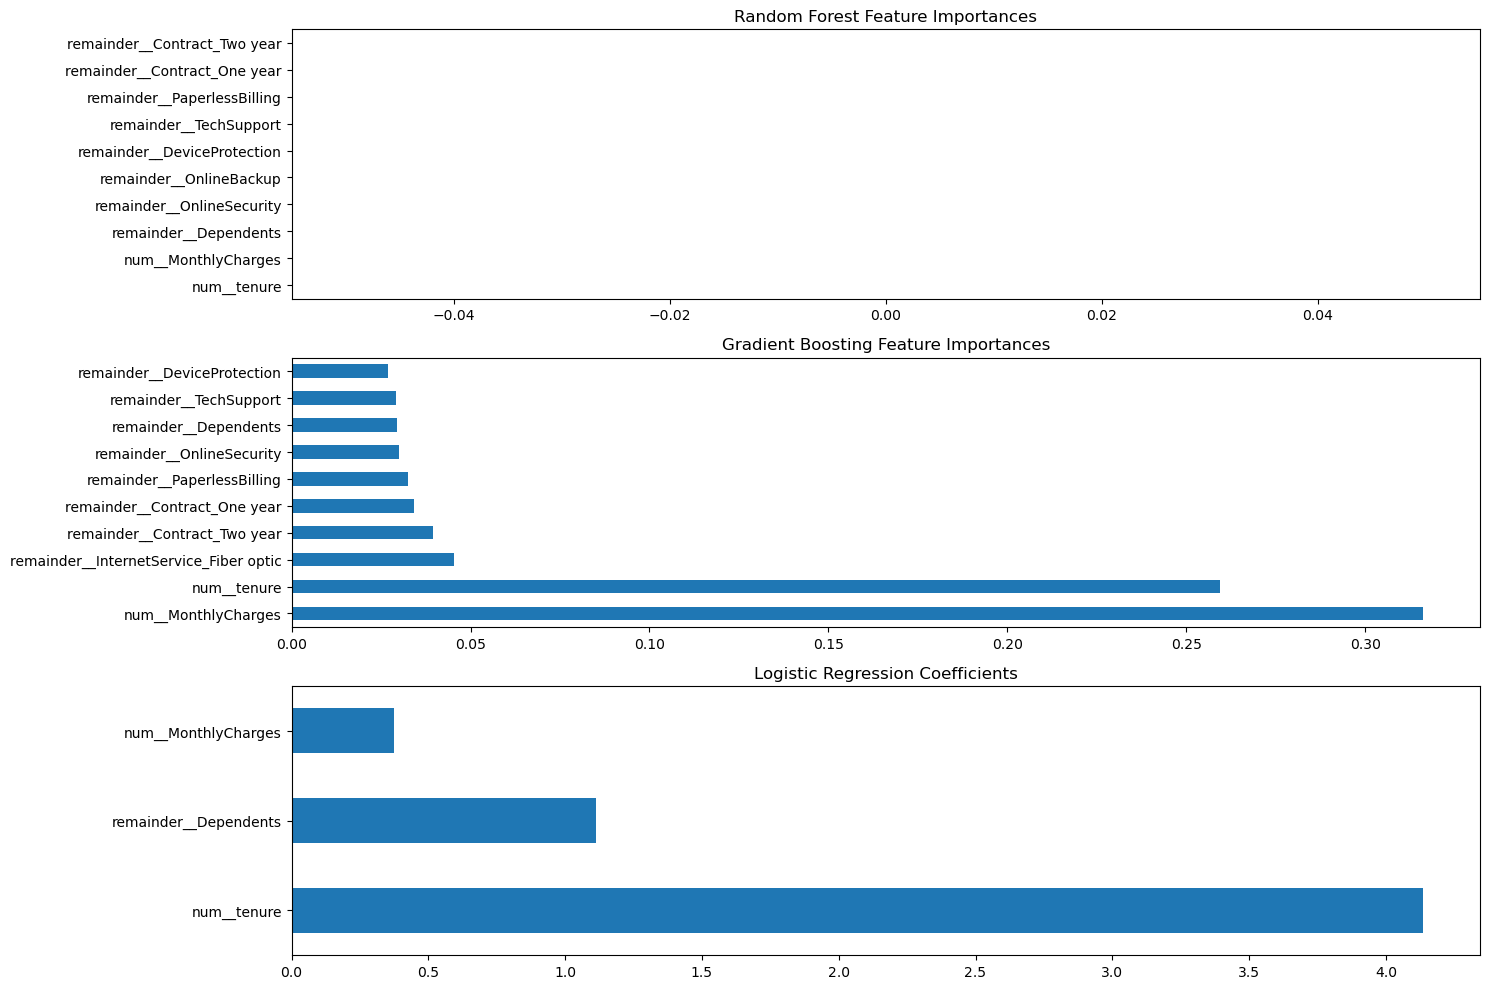

In [50]:
plt.figure(figsize=(15,10))
plt.subplot( 3, 1, 1)
if rf_feature_importances is None:
    plt.text(0.5, 0.5, 'Random Forest does not support feature_importances_', horizontalalignment='center', verticalalignment='center')
else:
    rf_feature_importances.head(10).plot(kind='barh', title='Random Forest Feature Importances')

plt.subplot( 3, 1, 2)
if gb_feature_importances is None:
    plt.text(0.5, 0.5, 'Gradient Boosting does not support feature_importances_', horizontalalignment='center', verticalalignment='center')
else:
    gb_feature_importances.head(10).plot(kind='barh', title='Gradient Boosting Feature Importances')

plt.subplot( 3, 1, 3)
lr_feature_importances.head(10).plot(kind='barh', title='Logistic Regression Coefficients')

plt.tight_layout()
plt.show()

### **Conclusion & Recommendation**

In [51]:
print('Classification Report Tuned Stacking Model:\n', report_tuned)

Classification Report Tuned Stacking Model:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       725
           1       0.66      0.51      0.57       260

    accuracy                           0.80       985
   macro avg       0.75      0.71      0.72       985
weighted avg       0.79      0.80      0.79       985



**Conclusion**

The results show that tenure(num__tenure), monthly charges(num__MonthlyCharges), and dependents (remainder__Dependents) are the top predictors of customer churn. While the Stacking Ensemble model achieves 80% accuracy and an ROC AUC of 84%, recall for churned customers remains low at 51%, indicating missed opportunities in identifying at-risk customers.

**Recommendations**
1. Target High-Risk Groups: Focus on customers with short tenure and high monthly charges. Offer incentives, discounts, or loyalty programs
2. Improve Recall: Address class imbalance with techniques like SMOTE or adjust model thresholds for better churn detection
3. Feature Enhancements: Combine related features (e.g. tenure+ contract types) and include behavior metrics like billing changes
4. Optimizing Models: Fine tune Random Forest and explore weighted class strategies for better recall

By targeting these key areas, churn prediction accuracy can improve, enabling more effective retention strategies.

In [52]:
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved as 'model.pkl'")

Model saved as 'model.pkl'


In [53]:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print('Model loaded successfully!')

Model loaded successfully!


In [54]:
y_pred_loaded = loaded_model.predict(X_test)
y_pred_proba_loaded = loaded_model.predict_proba(X_test)[:, 1]

roc_auc_loaded = roc_auc_score(y_test, y_pred_proba_loaded)
print(f"ROC AUC Score for Loaded Model: {roc_auc_loaded:.2f}")

ROC AUC Score for Loaded Model: 0.84
